### Project Overview
- Your goal is to evaluate every stock in the s&P500, and Nasdaq Adj Close as well as the daily return
- You will look for companies who too a dip (Loss for the day) as  well as companies that have spiked for the today's close

## Project approach:
- Use pandas data reader to get all Adj Close data for each stock for the year 2020 
- Will import all securities form a past project that passed properly through pandas data reader 
- Add all of resuts to a data frame
- Calculate the Daily return for each stock as well as the volitility year to date
- group Dips and Spikes - Which are worthy of investing

In [2]:
import pandas as pd 
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tickers = pd.read_csv("resources/passed_Tickers.csv", index_col='Unnamed: 0')

In [10]:
tickers = list(tickers["Tickers"].values)

## Fetching the data 
 - we need ot consider companies that myay no longer exist and or have failed 
 - We also need to store the failed companies for future use

In [16]:
data = pd.DataFrame()

In [17]:
failed = []
passed = []
for x in tickers:
    try:
        data[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        failed.append(x)

## Taking A Look at Arconic and the companies Coorelated Year to Date

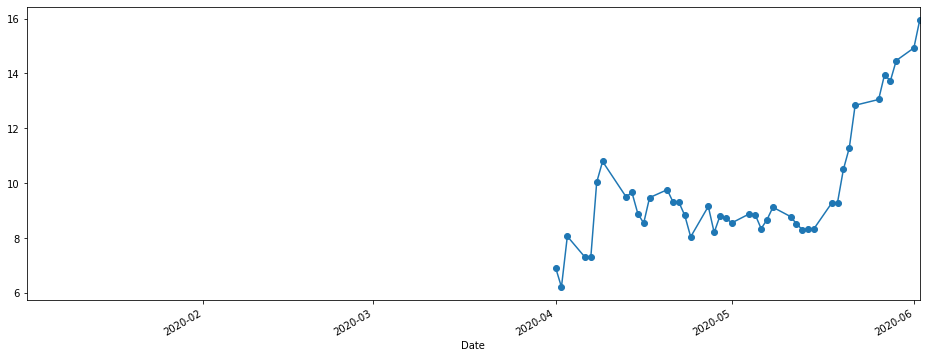

In [76]:
data["ARNC"].plot(figsize = (16,6), marker = "o")

### Passed Companies Passed 
- 471 companies passed the yahoo finance 

In [44]:
len(passed)

471

## Corr to Arconic
- Below are the top 20 companies coorelated to arconic 

In [28]:
data.corrwith(data["ARNC"]).sort_values(ascending = False).head(20)

ARNC    1.000000
RTN     1.000000
ALB     0.931615
DLTR    0.901532
PPG     0.896754
NKE     0.892185
MTD     0.887684
TDG     0.887498
GRMN    0.887291
F       0.882355
EL      0.882247
ETFC    0.879976
XRAY    0.879753
JBHT    0.878667
MS      0.878312
LB      0.877964
MCK     0.877705
GM      0.875251
CHRW    0.871827
HSIC    0.866828
dtype: float64

## Daily Returns for each Stock
- We will focus on todays closing only to see which companies Dip or spikes

In [30]:
returns_df = pd.DataFrame()
for x in passed:
    data[f"{x} daily return"] = data[f"{x}"].pct_change()
    returns_df[f"{x} daily returns"] = data[f"{x}"].pct_change()

## Analysis of todays close - Spikes
- top 20 companies that had the highest daily returns at close

In [39]:
returns_df.transpose()["2020-06-02"].sort_values(ascending = False).head(20)

WU daily returns      0.112989
DXC daily returns     0.094851
M daily returns       0.092622
EFX daily returns     0.077846
GPS daily returns     0.076845
HP daily returns      0.075481
SLG daily returns     0.073973
JWN daily returns     0.071730
ARNC daily returns    0.068319
OXY daily returns     0.068067
GT daily returns      0.064232
RE daily returns      0.063374
HES daily returns     0.062423
QCOM daily returns    0.061457
HAL daily returns     0.057941
EOG daily returns     0.057904
VTR daily returns     0.057183
MAC daily returns     0.053221
ALGN daily returns    0.052824
CXO daily returns     0.051395
Name: 2020-06-02 00:00:00, dtype: float64

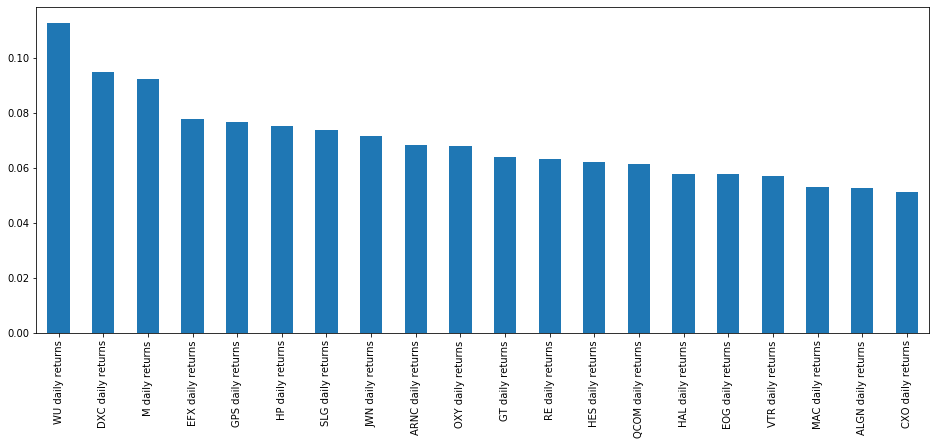

In [46]:
returns_df.transpose()["2020-06-02"].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = (16,6))

### Dips 
- top 20 companies that had the lowest daily returns fot todays close

In [40]:
returns_df.transpose()["2020-06-02"].sort_values(ascending = True).head(20)

TIF daily returns    -0.089261
COTY daily returns   -0.045558
NEM daily returns    -0.033394
TRIP daily returns   -0.030206
WYNN daily returns   -0.027408
UNM daily returns    -0.025529
GILD daily returns   -0.025279
MTB daily returns    -0.023312
CBOE daily returns   -0.022840
ALXN daily returns   -0.022200
CME daily returns    -0.019416
EQIX daily returns   -0.018981
CTXS daily returns   -0.018957
DLR daily returns    -0.017130
TDG daily returns    -0.014472
AMGN daily returns   -0.014058
SIVB daily returns   -0.013674
ICE daily returns    -0.013010
HRB daily returns    -0.012090
CRM daily returns    -0.012078
Name: 2020-06-02 00:00:00, dtype: float64

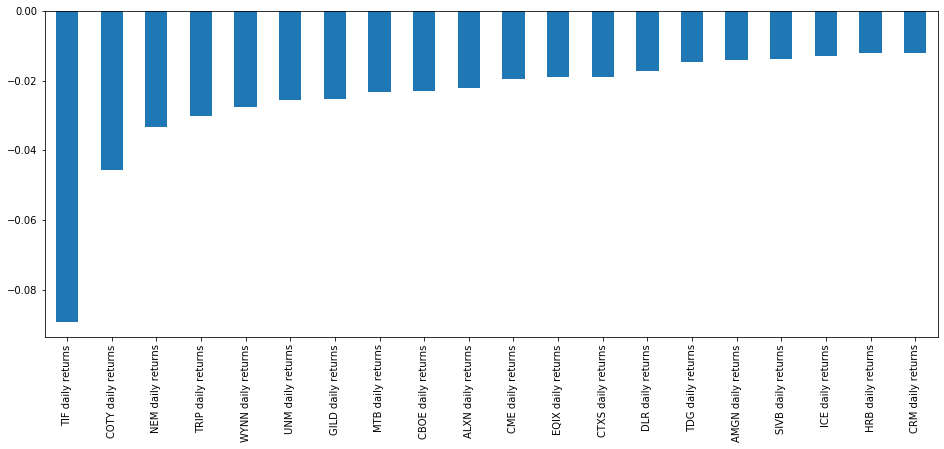

In [45]:
returns_df.transpose()["2020-06-02"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

# Nasdaq - Dips and Spikes

- Fetching Data
- we will repeat the same process for the Nasdaq

In [47]:
nasdaq = pd.DataFrame()

In [49]:
nasdaq_data = pd.read_excel("resources/nasdaq_100_stocks.xlsx")

In [54]:
nas_tickers = list(nasdaq_data["Ticker"].values)

In [57]:
nas_failed = []
nas_passed = []
for x in nas_tickers:
    try:
        nasdaq[x] = web.DataReader(x, data_source= "yahoo", start = "2020-1-1")["Adj Close"]
        nas_passed.append(x)
    except (IOError, KeyError):
        msg = 'Failed to read symbol: {0!r}, replacing with NaN.'
        nas_failed.append(x)

## Daily Returns for Nasdaq

In [61]:
nas_returns = pd.DataFrame()
for x in nas_passed:
    nasdaq[f"{x} returns"] = nasdaq[f"{x}"].pct_change()
    nas_returns[f"{x} returns"] = nasdaq[f"{x}"].pct_change()

### Spikes
 - Top 20 companies with the higheest daily returns

In [78]:
nas_returns.transpose()["2020-06-02"].sort_values(ascending = False).head(20)

QCOM returns    0.061457
ALGN returns    0.052824
TXN returns     0.040811
SWKS returns    0.039211
ADI returns     0.035645
NTAP returns    0.034450
HSIC returns    0.034189
KHC returns     0.033032
REGN returns    0.030343
AVGO returns    0.027829
NTES returns    0.027818
XLNX returns    0.024766
ASML returns    0.024485
NXPI returns    0.022784
EXPE returns    0.021839
WDC returns     0.021356
JBHT returns    0.019211
PYPL returns    0.019155
CSX returns     0.018628
MELI returns    0.018588
Name: 2020-06-02 00:00:00, dtype: float64

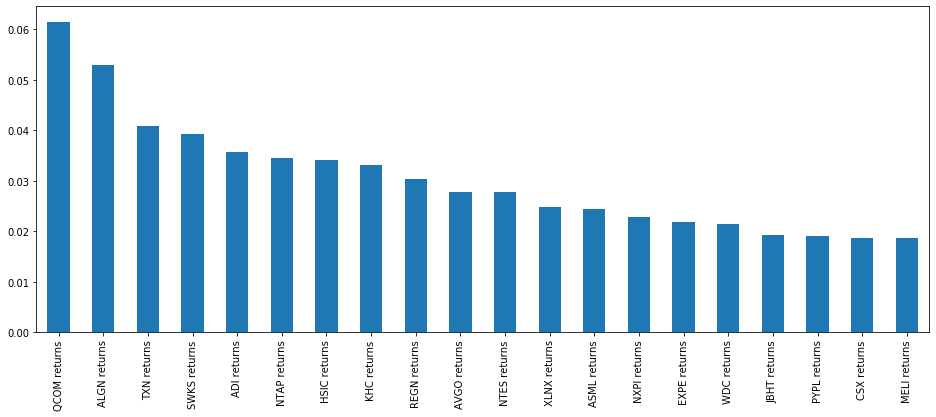

In [73]:
nas_returns.transpose()["2020-06-02"].sort_values(ascending = False).head(20).plot(kind = "bar", figsize = (16,6))

## Dips
- top 20 companies with the lowest daily returns for today

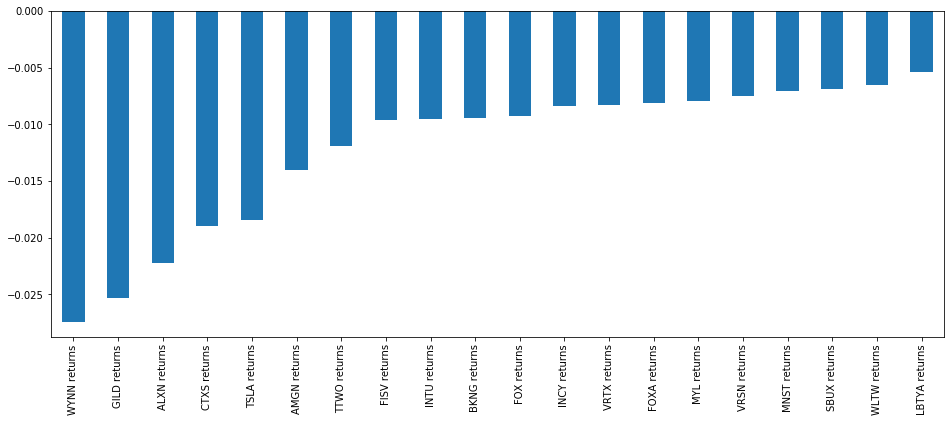

In [74]:
nas_returns.transpose()["2020-06-02"].sort_values(ascending = True).head(20).plot(kind = "bar", figsize = (16,6))

In [79]:
nas_returns.transpose()["2020-06-02"].sort_values(ascending = True).head(20)

WYNN returns    -0.027408
GILD returns    -0.025279
ALXN returns    -0.022200
CTXS returns    -0.018957
TSLA returns    -0.018417
AMGN returns    -0.014058
TTWO returns    -0.011892
FISV returns    -0.009645
INTU returns    -0.009553
BKNG returns    -0.009415
FOX returns     -0.009266
INCY returns    -0.008354
VRTX returns    -0.008268
FOXA returns    -0.008125
MYL returns     -0.007946
VRSN returns    -0.007488
MNST returns    -0.007026
SBUX returns    -0.006895
WLTW returns    -0.006569
LBTYA returns   -0.005388
Name: 2020-06-02 00:00:00, dtype: float64